## LeNet-5

Se aplica el algoritmo de LeNet-5 con el dataset de digitos de MNIST.

http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf

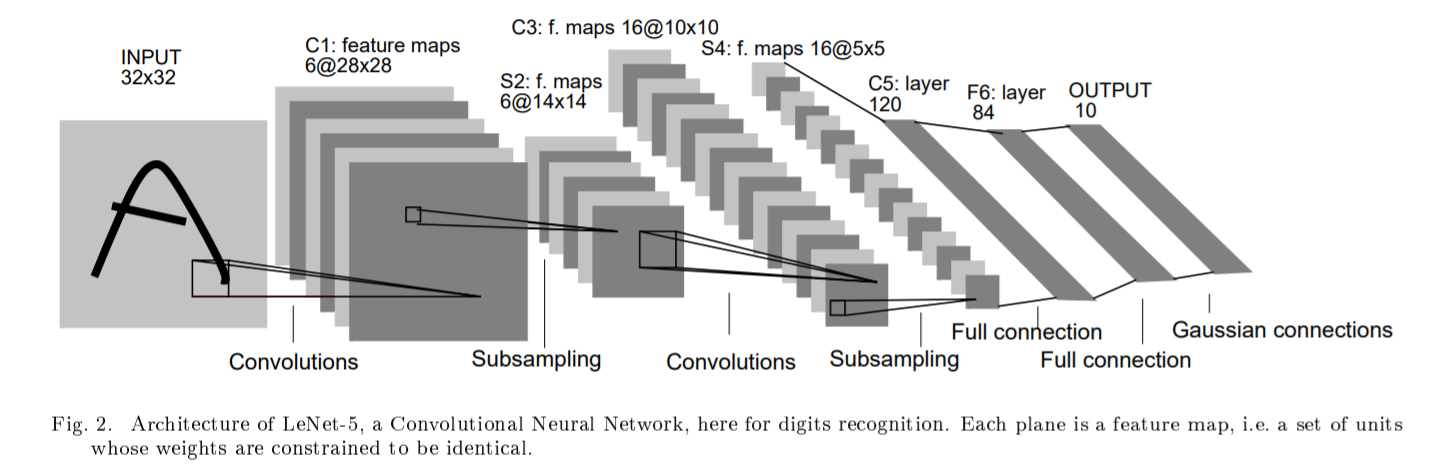

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,AveragePooling2D
from tensorflow.keras.utils import to_categorical

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential()
model.add(Conv2D(filters = 6, kernel_size = (5,5), strides=1, padding = 'valid', activation='tanh', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Conv2D(filters = 16, kernel_size = (5,5), strides=1, activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Conv2D(filters = 120, kernel_size = (5,5), strides=1, activation='tanh'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))  
model.add(Dense(10, activation='softmax'))  

# Compilar el modelo
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

## Cargamos los datos

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
Luego del padding
Train: X=(60000, 32, 32), y=(60000,)
Test: X=(10000, 32, 32), y=(10000,)


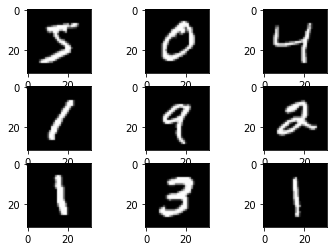

In [3]:
# Cargar el dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Imprimir un resumen de los datos
print('Train: X=%s, y=%s' % (train_x.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_x.shape, test_y.shape))

# padding para incremente la dimension a 32x32x1
train_x = np.pad(train_x, ((0,0),(2,2),(2,2)), 'constant')
test_x = np.pad(test_x, ((0,0),(2,2),(2,2)), 'constant')

# Imprimir un resumen de los datos
print('Luego del padding')
print('Train: X=%s, y=%s' % (train_x.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_x.shape, test_y.shape))

# Plotear las primeras imágenes
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

# Normalizamos las imágenes
train_x_n = (train_x / 255) - 0.5
test_x_n = (test_x / 255) - 0.5

# Hacemos reshape de las imágenes para que tengan un canal
train_x_n = train_x.reshape((train_x_n.shape[0], 32, 32, 1))
test_x_n = test_x.reshape((test_x_n.shape[0], 32, 32, 1))


Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1553 - accuracy: 0.9537 - val_loss: 0.0681 - val_accuracy: 0.9782
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0672 - accuracy: 0.9797 - val_loss: 0.0644 - val_accuracy: 0.9790
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0534 - val_accuracy: 0.9835
[7 2 1 0 4]
[7 2 1 0 4]


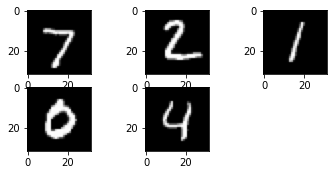

In [4]:
# Entrenamos el modelo
model_history = model.fit(
    train_x_n,
    to_categorical(train_y),
    epochs=3,
    validation_data=(test_x_n, to_categorical(test_y)),
)

# Predecir las primeras 5 imágines del test set
predicciones = model.predict(test_x_n[:5])

# Imprimir las predicciones
print(np.argmax(predicciones, axis=1)) # [7, 2, 1, 0, 4]

# Chequear que son correctas
print(test_y[:5]) # [7, 2, 1, 0, 4]

# Plotear esas imágenes
for i in range(5):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(test_x[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

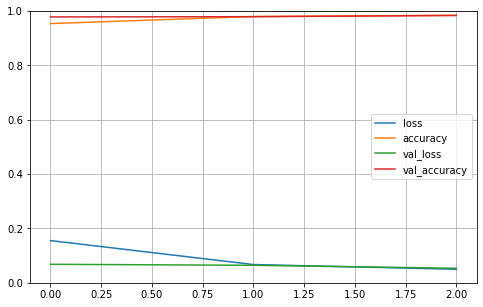

In [5]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()